In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [2]:
depth_results = pd.read_csv("results_depth.csv", index_col=0)
def extract_results(architecture, depth, metric):
    return depth_results.loc[[f"{architecture}_bidirectional_binary_depth{depth:02d}_{fold}_{metric}" for fold in range(6)]]

depths = range(1, 21)

resgcn_mse_means = np.array([extract_results("ResGCN", depth, "MSE").mean(1).mean() for depth in depths])
resgcn_mse_stds = np.array([extract_results("ResGCN", depth, "MSE").mean(1).std() for depth in depths])
resgcn_mse_confs = np.array([1.96 * std / (6 ** 0.5) for std in resgcn_mse_stds])
resgcn_nse_means = np.array([extract_results("ResGCN", depth, "NSE").mean(1).mean() for depth in depths])
resgcn_nse_stds = np.array([extract_results("ResGCN", depth, "NSE").mean(1).std() for depth in depths])
resgcn_nse_confs = np.array([1.96 * std / (6 ** 0.5) for std in resgcn_nse_stds])

gcnii_mse_means = np.array([extract_results("GCNII", depth, "MSE").mean(1).mean() for depth in depths])
gcnii_mse_stds = np.array([extract_results("GCNII", depth, "MSE").mean(1).std() for depth in depths])
gcnii_mse_confs = np.array([1.96 * std / (6 ** 0.5) for std in gcnii_mse_stds])
gcnii_nse_means = np.array([extract_results("GCNII", depth, "NSE").mean(1).mean() for depth in depths])
gcnii_nse_stds = np.array([extract_results("GCNII", depth, "NSE").mean(1).std() for depth in depths])
gcnii_nse_confs = np.array([1.96 * std / (6 ** 0.5) for std in gcnii_nse_stds])

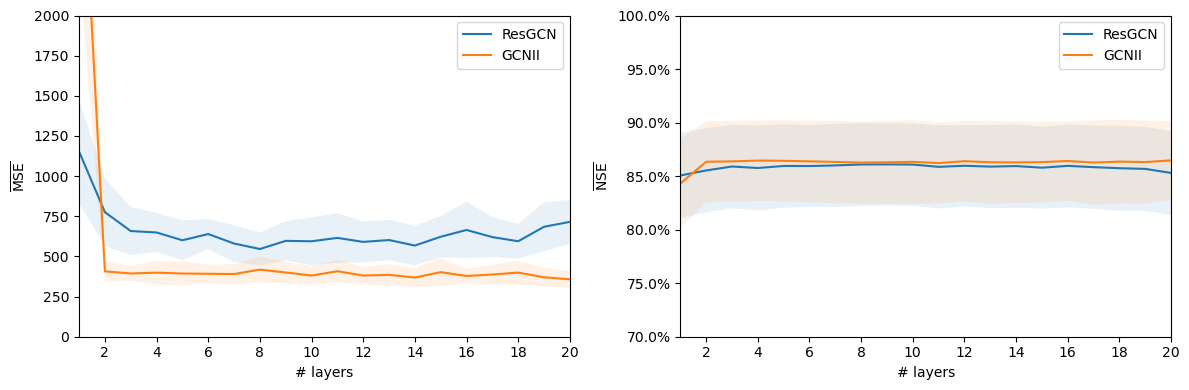

In [3]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(depths, resgcn_mse_means, label="ResGCN")
plt.fill_between(depths, resgcn_mse_means + resgcn_mse_confs, resgcn_mse_means - resgcn_mse_confs, alpha=0.1)
plt.plot(depths, gcnii_mse_means, label="GCNII")
plt.fill_between(depths, gcnii_mse_means + gcnii_mse_confs, gcnii_mse_means - gcnii_mse_confs, alpha=0.1)
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2.0))
plt.ylim((0, 2000))
plt.xlabel("# layers")
plt.ylabel("$\overline{\mathrm{MSE}}$")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depths, resgcn_nse_means, label="ResGCN")
plt.fill_between(depths, resgcn_nse_means + resgcn_nse_confs, resgcn_nse_means - resgcn_nse_confs, alpha=0.1)
plt.plot(depths, gcnii_nse_means, label="GCNII")
plt.fill_between(depths, gcnii_nse_means + gcnii_nse_confs, gcnii_nse_means - gcnii_nse_confs, alpha=0.1)
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2.0))
plt.ylim((0.70, 1))
plt.xlabel("# layers")
plt.ylabel("$\overline{\mathrm{NSE}}$")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.legend()

plt.tight_layout()
plt.savefig("figures/num_layers.pdf")
plt.show()